In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from scipy.stats import mode

from sklearn.datasets import load_iris
iris=load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [9]:
df['flower_name']=df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [10]:
df0=df[df.target==0]
df1=df[df.target==1]
df2=df[df.target==2]

In [14]:
X=df.drop(['target','flower_name'],axis='columns')
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
y=df.target

In [16]:
print(X)
print(y)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]
0      0
1      0
2      0
3      0
4   

In [17]:
def euclidean_distance(pt1,pt2):
    distance=np.sqrt(np.sum(pt1-pt2)**2)
    return distance

a = np.array([3,4])
b = np.array([5,9])

print(euclidean_distance(a,b))

7.0


In [22]:
def KNN(X_train,X_test,y_train,y_test,k_val):
    y_hat = []
    for test_pt in X_test.to_numpy():
        distances = []
        for i in range(len(X_train)):
            distances.append(euclidean_distance((np.array(X_train.iloc[i])),test_pt))
        
        distance_data = pd.DataFrame(data=distances, columns=['distance'], index = y_train.index)
        
        k_neighbours_list = distance_data.sort_values(by=['distance'], axis=0)[:k_val]
        
        labels = y_train.loc[k_neighbours_list.index]
        
        voting = mode(labels).mode[0]
        
        y_hat.append(voting)
    
    return y_hat

In [30]:
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)
y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=9)

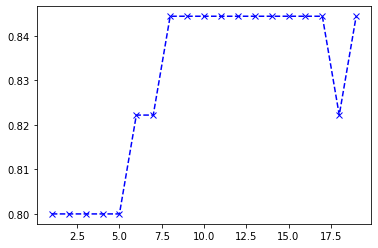

In [33]:
accuracy_vals = []
for i in range(1,20):
    y_hat_test = KNN(X_train,X_test,y_train,y_test,k_val=i)
    accuracy_vals.append(accuracy_score(y_test,y_hat_test))
plt.plot(range(1,20), accuracy_vals, color='blue', linestyle= 'dashed', marker='x')

In [34]:
y_hat_test = KNN(X_train, X_test, y_train, y_test, k_val=5)
print(accuracy_score(y_test,y_hat_test))

0.8


Text(0.5, 1.0, 'KNN Results')

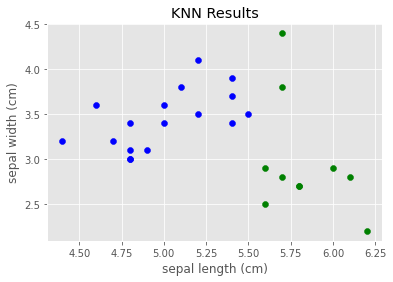

In [38]:
for i in range(len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['sepal length (cm)'], X_test.iloc[i]['sepal width (cm)'], color = 'blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['sepal length (cm)'], X_test.iloc[i]['sepal width (cm)'], color = 'green')

plt.style.use('ggplot')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title('KNN Results')

Text(0.5, 1.0, 'KNN Results')

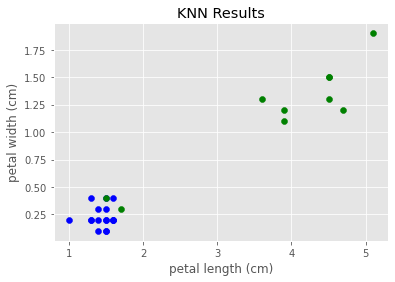

In [39]:
for i in range(len(y_hat_test)):
    if(y_hat_test[i]==0):
        plt.scatter(X_test.iloc[i]['petal length (cm)'], X_test.iloc[i]['petal width (cm)'], color = 'blue')
    if(y_hat_test[i]==1):
        plt.scatter(X_test.iloc[i]['petal length (cm)'], X_test.iloc[i]['petal width (cm)'], color = 'green')

plt.style.use('ggplot')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.title('KNN Results')